# Описание и примеры использования

Модель CLIP (Contrastive Language–Image Pretraining) от OpenAI — это мощная модель для связи между текстом и изображениями, которая может выполнять различные задачи. Вот что ещё можно сделать с CLIP помимо простого сравнения текста и изображения:

### 1. **Поиск по изображениям:**
   - CLIP может выполнять поиск по изображениям с использованием текста как запросов. Это означает, что вы можете передать набор изображений и найти те, которые наиболее соответствуют описанию текста.
   - Пример: если у вас есть каталог изображений товаров, вы можете ввести описание ('красное платье с узором') и найти изображение, наиболее соответствующее запросу.

### 2. **Поиск по тексту с использованием изображений:**
   - Вы можете использовать изображение как запрос для поиска наиболее релевантных текстов. Например, вы можете найти описание или категорию, которая лучше всего подходит к данному изображению.
   - Пример: вводите картинку платья, и CLIP определяет наиболее подходящие категории, такие как 'коктейльное платье', 'повседневное платье' и т.д.

### 3. **Классификация изображений:**
   - CLIP можно использовать для классификации изображений на основе набора категорий, заданных в текстовом виде.
   - Пример: если у вас есть несколько классов (например, 'футболка', 'джинсы', 'пальто'), CLIP может автоматически определять, к какому классу принадлежит изображение, даже если модель не была напрямую обучена на этих классах.

### 4. **Кластеризация изображений:**
   - Изображения можно кластеризовать по эмбеддингам, которые возвращает CLIP. Это может помочь, например, в группировке изображений, схожих по стилю, цветовой гамме или другим характеристикам.
   - Пример: можно кластеризовать изображения одежды на категории 'официальный стиль', 'спортивный стиль', 'повседневный стиль' и т.д.

### 5. **Создание описаний для изображений:**
   - Хотя CLIP изначально не предназначен для генерации текста, вы можете использовать эмбеддинги изображений как часть более сложной системы для создания описаний изображений.
   - Пример: CLIP может использоваться для генерации эмбеддингов изображения, которые затем могут быть использованы в модели, создающей описания изображений на основе этих эмбеддингов.

### 6. **Фильтрация контента:**
   - CLIP может быть использован для фильтрации контента, например, чтобы выбрать только релевантные изображения для конкретного контекста или тематики.
   - Пример: фильтрация изображений, которые подходят под описание 'летняя одежда', исключив зимние вещи, даже если они визуально сложные для других моделей.

### 7. **Работа с несколькими модальностями (Multimodal Tasks):**
   - CLIP хорошо подходит для задач, где нужно совместить работу с текстом и изображениями. Это может быть полезно для мультимодальных моделей, которые требуют обработки обоих типов данных одновременно.
   - Пример: создание системы для рекомендаций товаров, основанных на как текстовых описаниях, так и изображениях товара.

### 8. **Zero-shot классификация:**
   - Одна из ключевых особенностей CLIP — это возможность выполнения классификации в стиле zero-shot. Это означает, что модель может классифицировать изображения, даже если она не обучена на конкретном наборе данных для этой задачи.
   - Пример: если вы хотите классифицировать одежду по типам (например, 'спортивная обувь', 'шляпы'), вам не нужно обучать CLIP на этих категориях, достаточно предоставить текстовое описание этих классов.

In [17]:
import torch
from transformers import CLIPProcessor, CLIPModel

from PIL import Image
import matplotlib.pyplot as plt

In [60]:
# Скачиваем большую (продвинутую) модель CLIP
clip_large_model = CLIPModel.from_pretrained('openai/clip-vit-large-patch14')
clip_large_processor = CLIPProcessor.from_pretrained('openai/clip-vit-large-patch14')

### Пример первого подхода (расчёт по косинусному расстоянию), плохой метод.

Сходство между изображением и текстом: 0.13853715360164642


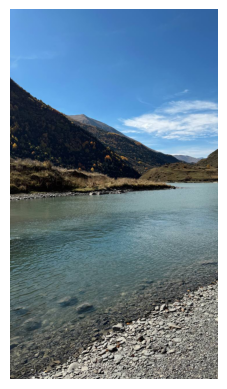

In [71]:
image_path = r'parsing/telegram_parser/data/mariannaeliseeva/media/2504.jpg'
image = Image.open(image_path)
text = 'Is clothes'  # Текстовое описание (промпт)

# Подготовка данных для модели
inputs = clip_large_processor(text=[text], images=image, return_tensors='pt', padding=True)

# Прогон через модель
outputs = clip_large_model(**inputs)

# Извлечение эмбеддингов изображения и текста
image_embeds = outputs.image_embeds
text_embeds = outputs.text_embeds

# Косинусное сходство между изображением и текстом
similarity = torch.cosine_similarity(image_embeds, text_embeds)
print(f'Сходство между изображением и текстом: {similarity.item()}')

plt.imshow(image)
plt.axis('off')
plt.show()

Сходство между изображением и текстом: 0.20615598559379578


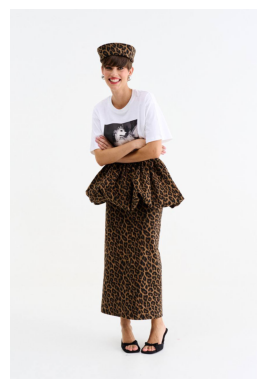

In [72]:
image_path = r'parsing/telegram_parser/data/mariannaeliseeva/media/2492.jpg'
image = Image.open(image_path)
text = 'Is clothes'  # Текстовое описание (промпт)

# Подготовка данных для модели
inputs = clip_large_processor(text=[text], images=image, return_tensors='pt', padding=True)

# Прогон через модель
outputs = clip_large_model(**inputs)

# Извлечение эмбеддингов изображения и текста
image_embeds = outputs.image_embeds
text_embeds = outputs.text_embeds

# Косинусное расстояние между изображением и текстом
similarity = torch.cosine_similarity(image_embeds, text_embeds)
print(f'Сходство между изображением и текстом: {similarity.item()}')

plt.imshow(image)
plt.axis('off')
plt.show()

### Пример второго подхода (выбор модели между альтернативами), хороший метод.

In [ ]:
def classify_image_clip_large(image_path):
    image = Image.open(image_path)
    inputs = clip_large_processor(text=['Is clothes', 'Is not clothes'], images=image, return_tensors='pt', padding=True)
    outputs = clip_large_model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)
    return probs[0][0].item()  # Вероятность наличия одежды (первого класса в списке)

Сходство между изображением и текстом: 0.21756000816822052


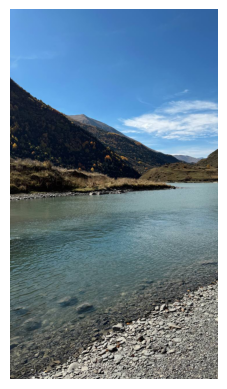

In [65]:
image_path = r'parsing/telegram_parser/data/mariannaeliseeva/media/2504.jpg'
image = Image.open(image_path)

print(f'Сходство между изображением и текстом: {classify_image_clip_large(image_path)}')

plt.imshow(image)
plt.axis('off')
plt.show()

Сходство между изображением и текстом: 0.9887195229530334


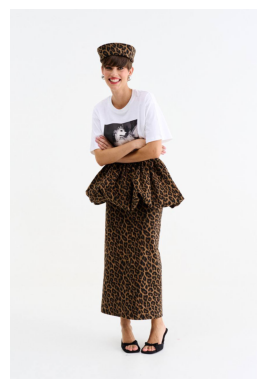

In [62]:
image_path = r'parsing/telegram_parser/data/mariannaeliseeva/media/2492.jpg'
image = Image.open(image_path)

print(f'Сходство между изображением и текстом: {classify_image_clip_large(image_path)}')

plt.imshow(image)
plt.axis('off')
plt.show()

Сходство между изображением и текстом: 0.9349403381347656


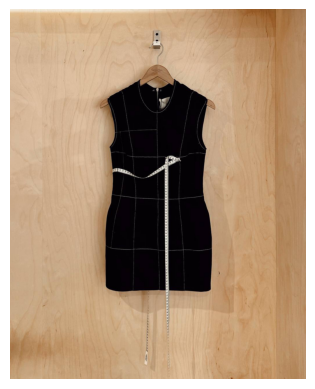

In [63]:
image_path = r'parsing/telegram_parser/data/mariannaeliseeva/media/2490.jpg' 
image = Image.open(image_path)

print(f'Сходство между изображением и текстом: {classify_image_clip_large(image_path)}')

plt.imshow(image)
plt.axis('off')
plt.show()

Сходство между изображением и текстом: 0.8126518130302429


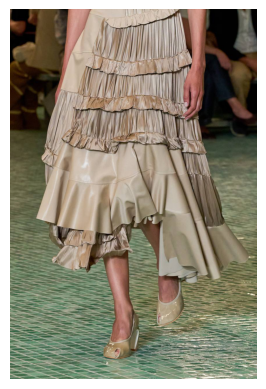

In [64]:
image_path = r'parsing/telegram_parser/data/mariannaeliseeva/media/2488.jpg' 
image = Image.open(image_path)

print(f'Сходство между изображением и текстом: {classify_image_clip_large(image_path)}')

plt.imshow(image)
plt.axis('off')
plt.show()

Сходство между изображением и текстом: 0.7796574831008911


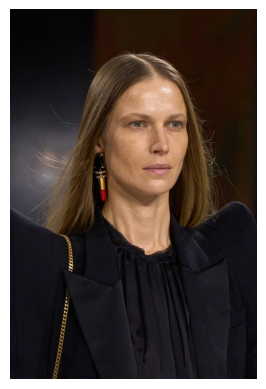

In [66]:
image_path = r'parsing/telegram_parser/data/mariannaeliseeva/media/2475.jpg'
image = Image.open(image_path)

print(f'Сходство между изображением и текстом: {classify_image_clip_large(image_path)}')

plt.imshow(image)
plt.axis('off')
plt.show()